In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("data/amazon_co-ecommerce_sample.csv")

In [119]:
df.describe(include='all')

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
count,10000,10000,9993,8565,7500,9982,9235.000000,9982,9310,8938,9349,9942,9349,6935,914,9979,6918
unique,10000,9964,2651,2625,89,194,NaN,19,255,8755,8514,9939,8514,6749,910,9901,6581
top,d9a5da67aebf106ec8b25791fd4ee755,Zoo Animal Hand Sock Glove Finger Puppets Sack...,LEGO,£9.99,2 new,1,NaN,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Scalextric | http://ww...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Is it 12 days or 24? // 24,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,1,3,171,189,1337,4315,NaN,5140,880,60,113,2,113,38,2,5,27
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.834976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.517268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Summary
* 10k unique product ids
    * 9349 have descriptions
    * 9310 have categories
    * Note: need to filter on joint
* 255 unique `amazon_category_and_sub_category` -- need to break these down 
* Suspect `description` and `product_description` are the same

In [6]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

In [122]:
df2 = df.dropna(subset=[
    'product_name',
    'amazon_category_and_sub_category',
    'description',
    'product_information',
    'product_description'
]).copy()

### After dropping NaNs on those columns we have 8639 products. 


In [123]:
df2.describe(include='all')

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
count,8639,8639,8638,7434,6576,8630,7994.000000,8630,8639,7755,8639,8639,8639,6049,806,8627,5936
unique,8639,8609,2264,2405,75,181,NaN,19,250,7581,7828,8637,7828,5873,804,8560,5655
top,d9a5da67aebf106ec8b25791fd4ee755,Zoo Animal Hand Sock Glove Finger Puppets Sack...,Disney,£9.99,2 new,1,NaN,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Scalextric | http://ww...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Are these the newest cards out? // HelloYes th...,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,1,3,160,160,1137,3709,NaN,4427,855,60,113,2,113,38,2,5,27
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.845509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.590830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df2[['product_name', 'amazon_category_and_sub_category', 'description', 'product_description', 'product_information']]

,product_name,amazon_category_and_sub_category,description,product_description,product_information
0,Hornby 2014 Catalogue,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...
1,FunkyBuys® Large Christmas Holiday Express Fes...,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...
...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Hobbies > Collectible Figures & Memorabilia > ...,IRON MAN needs a drill thats as tough as he is...,IRON MAN needs a drill thats as tough as he is...,Technical Details Item Weight281 g Product Dim...
9994,Factory Entertainment Green Hornet Movie: Kato...,Hobbies > Collectible Figures & Memorabilia > ...,6 inch action figure featuring the Kato chract...,6 inch action figure featuring the Kato chract...,Technical Details Item Weight204 g Product Dim...
9995,Batman 1966 TV Series Action Figures - The Rid...,Hobbies > Collectible Figures & Memorabilia > ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Novelty & Special Use > Novelty > Accessories ...,*Includes 1x Badge with holder and chain *High...,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...


In [178]:
np.all(df2['description'] == df2['product_description'])

True

### As suspected -- `description` and `product_description` are redundant
So we'll drop one of them. 

In [180]:
df2.drop(columns='product_description', inplace=True)

### Let's drill down into the amazon categories
The category column contains nested categories labels for each product, separated by ">". Let's separate them and grab the main category and the first subcategory. (There are up to five nested categories but that's a little too much). 

In [130]:
def category(row):
    return row['amazon_category_and_sub_category'].split(" > ")[0]

def sub_category(row):
    return row['amazon_category_and_sub_category'].split(" > ")[1]

In [131]:
df2['category'] = df2.apply(category, axis=1)
df2['sub_category'] = df2.apply(sub_category, axis=1)

In [133]:
df2.describe(include='all')

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,category,sub_category
count,8639,8639,8638,7434,6576,8630,7994.000000,8630,8639,7755,8639,8639,8639,6049,806,8627,5936,8639,8639
unique,8639,8609,2264,2405,75,181,NaN,19,250,7581,7828,8637,7828,5873,804,8560,5655,42,145
top,d9a5da67aebf106ec8b25791fd4ee755,Zoo Animal Hand Sock Glove Finger Puppets Sack...,Disney,£9.99,2 new,1,NaN,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Scalextric | http://ww...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Are these the newest cards out? // HelloYes th...,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",...",Hobbies,Toy Vehicles & Accessories
freq,1,3,160,160,1137,3709,NaN,4427,855,60,113,2,113,38,2,5,27,1329,1067
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.845509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.590830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### There are still 42 main categories. That's a lot.
But it turns out only about a dozen have a substantial number of products associated with them. 

In [182]:
df2['category'].value_counts()

Hobbies                             1329
Die-Cast & Toy Vehicles             1185
Figures & Playsets                  1070
Characters & Brands                  908
Games                                891
Arts & Crafts                        736
Party Supplies                       583
Fancy Dress                          540
Sports Toys & Outdoor                335
Dolls & Accessories                  314
Puppets & Puppet Theatres            262
Jigsaws & Puzzles                    258
Baby & Toddler Toys                  103
Pretend Play                          37
Musical Toy Instruments               18
Novelty & Special Use                 11
Pens, Pencils & Writing Supplies       7
Office Supplies                        6
Electronic Toys                        5
Home Accessories                       4
Cooking & Dining                       4
Women                                  3
Educational Toys                       3
Worlds Apart                           3
Gardening       

### Let's just keep the categories with the most products (100+)

In [183]:
keepers = df2['category'].value_counts() > 100
df2['top_category'] = df2['category'].map(keepers)

In [184]:
df3 = df2[df2['top_category'] == True].copy()

### Save the filtered dataset

In [185]:
df3.to_csv("data/filtered_amazon_co-ecommerce_sample.csv")

# Let's take a look at the product descriptions

In [191]:
def count_tokens(row):
    return len(row.loc['description'].split(" "))

df3['description_token_count'] = df3.apply(count_tokens, axis=1)

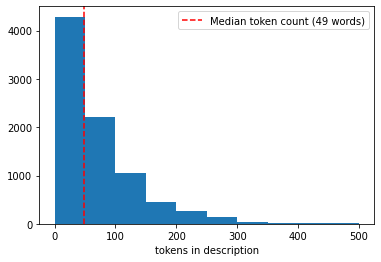

In [219]:
med_token_count = df3['description_token_count'].median()
plt.hist(df3['description_token_count'],bins=10, range=(0,500))
plt.axvline(med_token_count, color='r', ls='--', label=f"Median token count ({int(med_token_count)} words)")
plt.xlabel('tokens in description')
plt.legend()

In [207]:
df3['description_token_count']

0        11
1        20
2        61
3        12
4        61
       ... 
9992     42
9993    100
9994     13
9995     11
9998     71
Name: description_token_count, Length: 8514, dtype: int64